# EDA

## IMPORTAR PAQUETES

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [17]:
ruta_proyecto = '../../'

Nombres de los ficheros de datos.

In [18]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [19]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [20]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [21]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
27,ambito,International Business,0.022001
34,ambito,Travel and Tourism,0.026702
29,ambito,Media and Advertising,0.027830
22,ambito,"Banking, Investment And Insurance",0.043813
33,ambito,Supply Chain Management,0.044566
26,ambito,IT Projects Management,0.047950
23,ambito,Business Administration,0.052275
31,ambito,Operations Management,0.063934
30,ambito,OTROS,0.083490
25,ambito,Human Resource Management,0.105303


- Todos los de la 'conociste' fuera, no añaden valor

- Los de no_enviar_mail, tambien fuera ya que no quieren que les envie mail no son buenos leads

- No llamar lo mismo

- ult_actividad: los que son email bounced, eso lo mejor es eliminarlo ya que son emails temporales

In [22]:
# Pongo solo los registros con los que me quiero quedar

cat.loc[(cat.no_llamar!='OTROS') & (cat.no_enviar_email!='Yes') & (cat.ult_actividad!='Email Bounced')]

,origen,fuente,no_enviar_email,no_llamar,ult_actividad,ambito,ocupacion,conociste_google,conociste_periodico,conociste_youtube,conociste_facebook,conociste_referencias,descarga_lm
id,,,,,,,,,,,,,
660737,API,Chat,No,No,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No
660728,API,Organic Search,No,No,Email Opened,Select,Unemployed,No,No,No,No,No,No
660727,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,No,No,No,Yes
660719,Landing Page Submission,Direct Traffic,No,No,OTROS,Media and Advertising,Unemployed,No,No,No,No,No,No
660681,Landing Page Submission,Google,No,No,Converted to Lead,Select,Unemployed,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579642,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Human Resource Management,Unemployed,No,No,No,No,No,Yes
579622,API,Direct Traffic,No,No,SMS Sent,Select,Unemployed,No,No,No,No,No,No
579546,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,No,Yes


In [23]:
cat.shape

(5318, 13)

Efectivamente hay menos registros

In [24]:
#Elimino las variables

cat = cat.loc[(cat.no_llamar!='OTROS') & (cat.no_enviar_email!='Yes') & (cat.ult_actividad!='Email Bounced')].drop(columns = ['conociste_facebook','conociste_google','conociste_periodico','conociste_youtube','conociste_referencias','no_enviar_email','no_llamar'])

cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No
660728,API,Organic Search,Email Opened,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No
660681,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,No
...,...,...,...,...,...,...
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes
579622,API,Direct Traffic,SMS Sent,Select,Unemployed,No
579546,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Yes


Los registros eliminados en el dataset cat tambien tiene que coincidir con el de numericos, sino se rellena de nulos

In [25]:
cat.shape

(4840, 6)

In [26]:
num.shape

(5318, 6)

Lo resuelvo a traves del indice

Solo quiero los registros que esten dentro del indice numerico.

In [27]:
#Cojo el dataset numerico con aquellos numeros de indice del numerico que existan en el cateogrico
num[num.index.isin(cat.index)]

,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
id,,,,,,
660737,0,0,0,0.0,15.0,15.0
660728,0,5,674,2.5,15.0,15.0
660727,1,2,1532,2.0,14.0,20.0
660719,0,1,305,1.0,13.0,17.0
660681,1,2,1428,1.0,15.0,18.0
...,...,...,...,...,...,...
579642,0,2,1770,2.0,14.0,20.0
579622,1,13,1409,2.6,14.0,16.0
579546,0,2,238,2.0,14.0,19.0


In [28]:
num[num.index.isin(cat.index)].shape == cat.shape

True

Como es correcto lo paso como definitivo

In [29]:
num = num[num.index.isin(cat.index)]

### Análisis gráfico

In [30]:
def graficos_eda_categoricos(cat):
    
    #Calcula el número de filas que necesita
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Define el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplana para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Crea el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

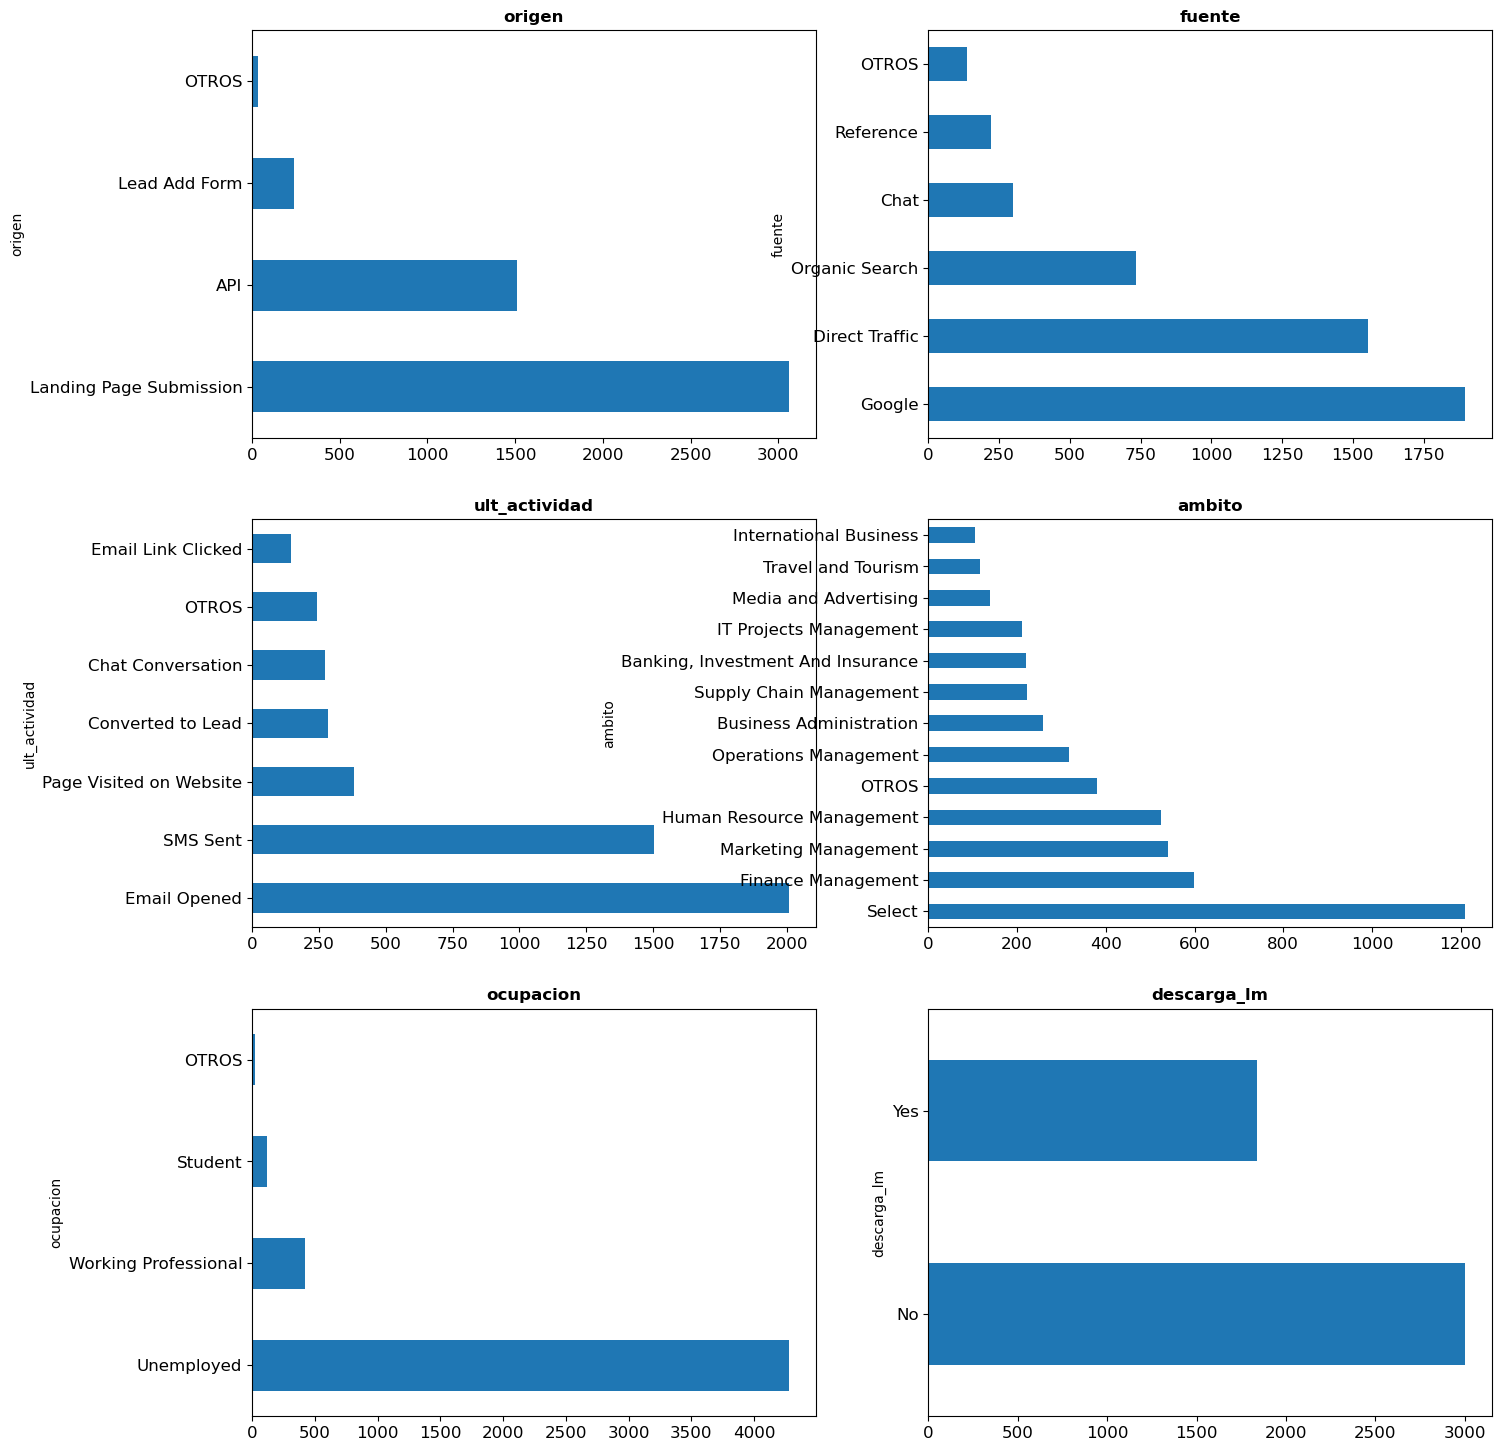

In [31]:
graficos_eda_categoricos(cat)

**Conclusiones**

* La gran mayoria de los leads que se producen son desempleados, tiene sentido? Tiene menor poder adquisitivo
* Las fuentes principales son Direct Traffic y Google, pontenciaría lo que viene de alli
* Las profesiones que mas leads vienen con Finanzas RRHH y Marketing


Esto si fuera Business analytics haria una analisis mucho mas profundo, pero claro no es el foco principal de mi proyecto ML.

## EDA NUMÉRICAS

### Análisis estadístico

In [32]:
def estadisticos_cont(num):
    #Calcula describe
    estadisticos = num.describe().T
    #Añade la mediana
    estadisticos['median'] = num.median()
    #Reordena para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(estadisticos)

In [33]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4840.0,0.413017,0.0,0.492427,0.0,0.0,0.0,1.0,1.0
visitas_total,4840.0,4.155165,3.0,3.467157,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4840.0,607.157025,367.0,556.558513,0.0,133.0,367.0,1096.25,2253.0
paginas_vistas_visita,4840.0,2.89318,2.5,1.911834,0.0,2.0,2.5,4.0,15.0
score_actividad,4840.0,14.06343,14.0,0.948512,8.0,14.0,14.0,14.0,18.0
score_perfil,4840.0,16.313636,16.0,1.420621,11.0,16.0,16.0,17.0,20.0


* Compra: nos dice que el 41% de los leads acaba comprando
* Visitas: mediana 3 max 50
* tiempo site: el que mas ha pasado 30' la mediana 367sec osea 6 min parece que tiene sentido
* paginas vistas: 2,5 tiene sentido
* score_actividad: max puntuacion es un 18 min es un 8, ya aprendes algo mas de esa puntuacion como es, siendo la mediana 14
* score_perfil: tiene sentido tambien


No hay ningua barbaridad, todo correcto en estas variable

### Análisis gráfico

In [34]:
def graficos_eda_continuas(num):
    
    #Calcula el número de fila que necesito
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Define el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplana para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Crea el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

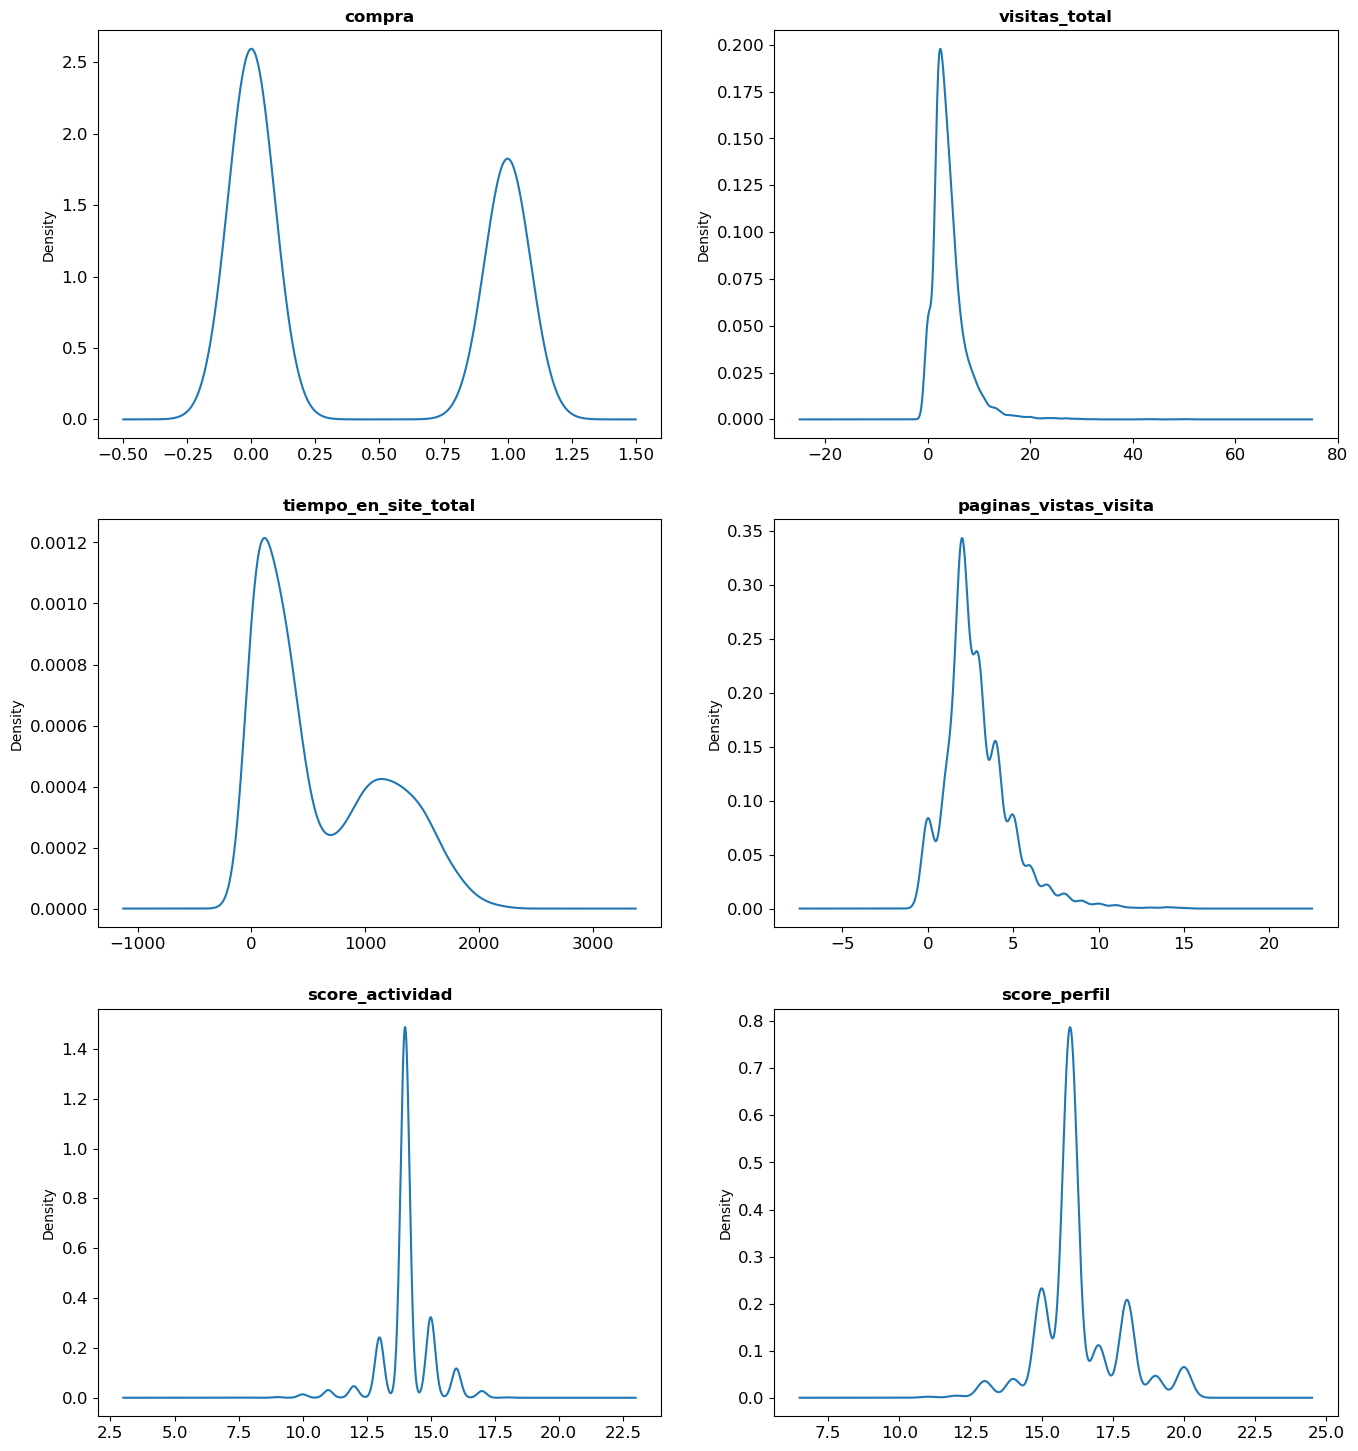

In [35]:
graficos_eda_continuas(num)

* Compra: dos distribuciones normales, tiene sentido es compra o no
* Visita_total: se parece a una distribucion normal
* tiempo en site: distribucion bimodal, dos segmentos de clientes que pasan muy poco tiempo y toros que pasan bastante tiempo
* pagians vistas: distribucion normal
* los dos score tambien bastante normal


no hace falta hacer normalizacion de variables

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.


In [36]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [37]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)